# Skymap in the direction of KM3-230213A

Figure 4, reproduced from the coordinate list available in the methods section: Skymap in the direction of KM3-230213A (red star) with the error regions within R(68%), R(90%) and R(99%) shown as dotted, dashed, and solid contours respectively. 

In [1]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sys.path.append("../src")

from data_access import get_event

In [2]:
voevent = get_event()

data = pd.read_csv("../data/supplementary/figuresource/Figure4.csv", skiprows=1)

data

,Source,RA J2000 [deg],Dec J2000 [deg],Dist,Name,Method 1,Method 2,Method 3,Method 4
0,#1,94.263708,-8.373833,0.57,NVSS J061703−082225,True,False,False,False
1,#2,94.057100,-6.898300,0.94,4FGL J0616.2−0653,False,False,False,True
2,#3,95.741858,-6.947770,1.66,RFC J0622−0656,False,True,False,False
3,#4,96.230542,-7.593528,1.92,NVSS J062455−073536,False,False,False,True
4,#5,94.586114,-9.907146,2.12,RFC J0618−0954,False,True,False,False
5,#6,91.998747,-8.580550,2.41,RFC J0607−0834,True,True,True,True
6,#7,92.416542,-6.251611,2.43,CRATES J0609−0615,False,False,True,False
7,#8,91.681443,-7.408397,2.63,RFC J0606−0724,True,True,True,False
8,#9,94.174198,-10.685682,2.88,RFC J0616−1041,True,True,False,True
9,#10,91.666542,-6.572528,2.89,NVSS J060639−063421,True,False,False,False


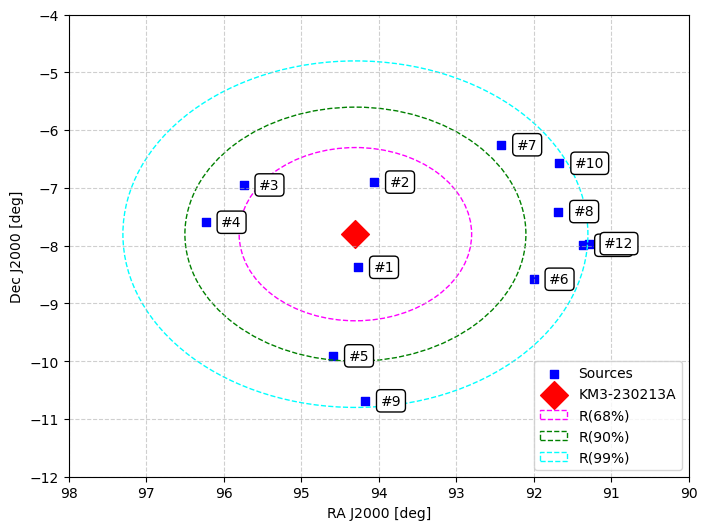

In [3]:
# Extract coordinates
labels = data["Source"].values
ra = data["RA J2000 [deg]"].values
dec = data["Dec J2000 [deg]"].values

evtcoord = [float(voevent.WhereWhen.ObsDataLocation.ObservationLocation.AstroCoords.Position2D.Value2.C1), 
            float(voevent.WhereWhen.ObsDataLocation.ObservationLocation.AstroCoords.Position2D.Value2.C2)]

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data["RA J2000 [deg]"].values, data["Dec J2000 [deg]"].values, marker="s", color="blue", label="Sources")
ax.scatter([evtcoord[0]], 
           [evtcoord[1]], 
           marker="D", color="red", s=200, label="KM3-230213A")

# Add labels with frames (moved to the right of each point)
for i, txt in enumerate(labels):
    ax.text(ra[i] - 0.2, dec[i], txt, fontsize=10, ha='left', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Confidence regions (example circles)
confidence_radii = [voevent.WhereWhen.ObsDataLocation.ObservationLocation.AstroCoords.Position2D.Error2Radius68, 
                    voevent.WhereWhen.ObsDataLocation.ObservationLocation.AstroCoords.Position2D.Error2Radius90, 
                    voevent.WhereWhen.ObsDataLocation.ObservationLocation.AstroCoords.Position2D.Error2Radius99] 
colors = ['magenta', 'green', 'cyan']
labels = ["R(68%)", "R(90%)", "R(99%)"]
for r, c, l in zip(confidence_radii, colors, labels):
    circle = plt.Circle(evtcoord, r, color=c, fill=False, linestyle='dashed', label=l)
    ax.add_patch(circle)

# Labels and grid
ax.set_xlabel("RA J2000 [deg]")
ax.set_ylabel("Dec J2000 [deg]")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlim(98, 90)  # Invert X-axis
ax.set_ylim(-12, -4)

# Show plot
plt.show()
